In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from upsetplot import plot as up_plt
from datetime import datetime

plt.style.use('ggplot')
%matplotlib inline

In [2]:
ELSEVIER_RES_PATH = "../res/elsevier/meta.jsonl"

In [3]:
df_elsevier = pd.read_json(ELSEVIER_RES_PATH, lines=True)
df_elsevier = df_elsevier.drop(columns=['originalText.xocs:doc.xocs:meta.xocs:open-access.xocs:oa-access-inherited-from',
                                       'coredata.openaccessSponsorName', 'originalText.xocs:doc.xocs:meta.xocs:open-access.xocs:oa-sponsor.xocs:oa-sponsor-name',
                                       'originalText.xocs:doc.xocs:meta.xocs:open-access.xocs:oa-access-inherited-from.@wintype',
                                       'originalText.xocs:doc.xocs:meta.xocs:open-access.xocs:oa-access-inherited-from.@winid',
                                       'originalText.xocs:doc.xocs:meta.xocs:open-access.xocs:oa-access-inherited-from.$',
                                       'originalText.xocs:doc.xocs:meta.xocs:open-access.xocs:oa-sponsor.xocs:oa-sponsor-type',
                                       'coredata.openaccessSponsorType', 'originalText.xocs:doc.xocs:meta.xocs:open-access.xocs:oa-user-license',
                                       'originalText.xocs:doc.xocs:meta.xocs:open-access.xocs:oa-article-status.$',
                                       'originalText.xocs:doc.xocs:meta.xocs:open-access.xocs:oa-access-effective-date',
                                       'link.@rel', 'link.@href'])

print(len(df_elsevier.index))
df_elsevier.head(5)

20045


,coredata.articleNumber,coredata.dc:creator,coredata.dc:description,coredata.dc:format,coredata.dc:identifier,coredata.dc:title,coredata.dcterms:isPartOf,coredata.dcterms:subject,coredata.eid,coredata.link,...,coredata.prism:url,coredata.prism:volume,coredata.pubType,originalText.xocs:doc.xocs:meta.xocs:available-online-date.$,originalText.xocs:doc.xocs:meta.xocs:available-online-date.@yyyymmdd,originalText.xocs:doc.xocs:meta.xocs:open-access.xocs:oa-article-status.@is-open-access,originalText.xocs:doc.xocs:meta.xocs:open-access.xocs:oa-article-status.@is-open-archive,pubmed-id,scopus-eid,scopus-id
0,None,"[{'@_fa': 'true', '$': 'Overall, James C.'}]",\n Abstract\n \n ...,application/json,doi:10.1016/0002-8703(72)90077-4,Intrauterine virus infections and congenital h...,None,None,1-s2.0-0002870372900774,[{'@href': 'https://api.elsevier.com/content/a...,...,https://api.elsevier.com/content/article/pii/0...,84.0,None,2004-02-28,20040228,0,0,4361535.0,2-s2.0-0015469473,15469473.0
1,None,"[{'@_fa': 'true', '$': 'Georgescu, Leonida'}, ...",None,application/json,doi:10.1016/0002-8703(80)90355-5,Coronaviruses in Balkan nephritis,None,None,1-s2.0-0002870380903555,[{'@href': 'https://api.elsevier.com/content/a...,...,https://api.elsevier.com/content/article/pii/0...,99.0,\n Annotation\n,2004-02-03,20040203,0,0,6243850.0,2-s2.0-0018939420,18939420.0
2,None,"[{'@_fa': 'true', '$': 'Friedman, Gary D'}]",None,application/json,doi:10.1016/0002-8703(80)90356-7,Cigarette smoking and coronary heart disease: ...,None,None,1-s2.0-0002870380903567,[{'@href': 'https://api.elsevier.com/content/a...,...,https://api.elsevier.com/content/article/pii/0...,99.0,\n Annotation\n,2004-02-03,20040203,0,0,7355701.0,2-s2.0-0019308150,19308150.0
3,None,"[{'@_fa': 'true', '$': 'Brunner, Carolyn M.'},...",\n Abstract\n \n ...,application/json,doi:10.1016/0002-9343(73)90176-9,Clinical and immunologic studies in identical ...,None,None,1-s2.0-0002934373901769,[{'@href': 'https://api.elsevier.com/content/a...,...,https://api.elsevier.com/content/article/pii/0...,55.0,\n Case report\n,2004-03-13,20040313,0,0,4579077.0,2-s2.0-0015901503,15901503.0
4,None,"[{'@_fa': 'true', '$': 'Garibaldi, Richard A.'}]",\n Abstract\n \n ...,application/json,doi:10.1016/0002-9343(85)90361-4,Epidemiology of community-acquired respiratory...,None,None,1-s2.0-0002934385903614,[{'@href': 'https://api.elsevier.com/content/a...,...,https://api.elsevier.com/content/article/pii/0...,78.0,None,2004-05-19,20040519,0,0,4014285.0,2-s2.0-0021833179,21833179.0


In [4]:
df_elsevier.isna().sum().sort_values(ascending=False)

coredata.articleNumber                                                                      19607
coredata.prism:edition                                                                      18632
coredata.openaccessUserLicense                                                              17349
coredata.openaccessType                                                                     17346
coredata.prism:issueName                                                                    16767
coredata.dcterms:isPartOf                                                                   16499
coredata.prism:isbn                                                                         16499
coredata.pubType                                                                            12338
pubmed-id                                                                                    9741
coredata.dcterms:subject                                                                     9428
coredata.prism:numbe

In [5]:
#mis_vals = df_elsevier.isna().groupby(df_elsevier.columns.tolist()).size()
#up_plt(mis_vals, orientation='vertical', show_percentages=True, sort_by='cardinality')
#plt.show()

In [6]:
df_elsevier['parsed_date'] = pd.to_datetime(df_elsevier['coredata.prism:coverDate'])

NA 0


parsed_date
2020-12-31    1236
2016-12-31    1084
2015-12-31    1048
2019-12-31    1027
2006-12-31    1015
2017-12-31     981
2008-12-31     978
2014-12-31     976
2018-12-31     971
2009-12-31     967
Name: coredata.eid, dtype: int64

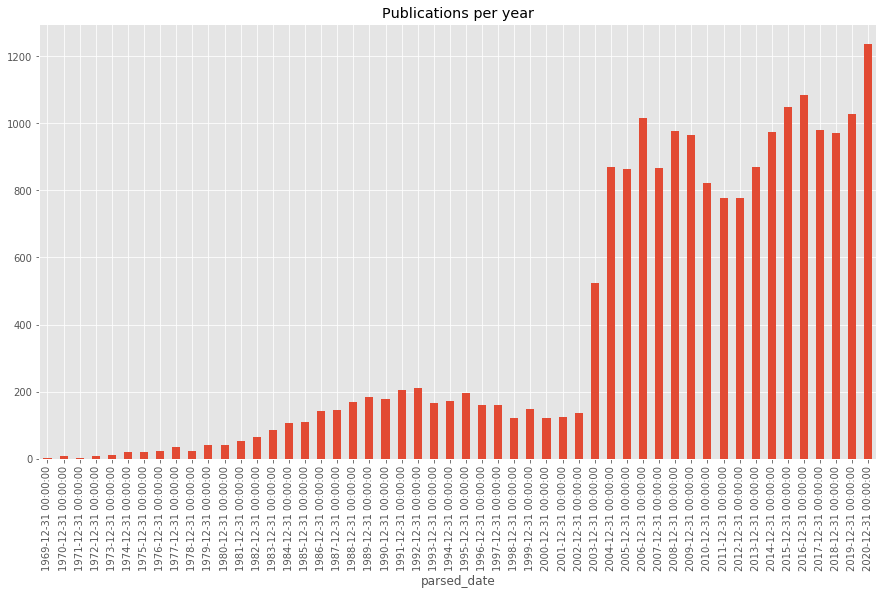

In [7]:
df_elsevier.set_index('parsed_date').resample('y').count()['coredata.eid'].plot(kind='bar', figsize=(15,8), title='Publications per year')
print('NA', df_elsevier['parsed_date'].isna().sum())
df_elsevier.set_index('parsed_date').resample('y').count()['coredata.eid'].sort_values(ascending=False).head(10)